# DATA 240-21, Fall 2024  
# Assignment #1  


Release on Sept 11th, 2024  

Due 11:59pm on Sept 24th, 2024   

Notes  
This assignment should be submitted in Canvas as a format of ipython notebook (assignment1.ipynb).  

No late assignments will be accepted. Do not accept any other format. Minimum penalty is 2pts with acceptable excuse. You may collaborate on homework but must independently write code/solutions. Copying and other forms of cheating will not be tolerated and will result in a zero score for the homework (minimal penalty) or a failing grade for the course. Your work will be graded in terms of correctness, completeness, and clarity, not just the answer. Thus, correct answers with no or poorly written supporting steps may receive very little credit.  
 
Please download used_cars_data.csv. This is a dataset consisting of used car sales prices.  
 

# 1. (1 pt) Data cleaning  

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('used_cars_data.csv')
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


### Please remove the following columns: ‘S.No’ and ‘New_Price’.  

In [3]:
df = df.drop(columns = ['S.No.', 'New_Price'])
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


### Please create ‘Car_Age’ feature which is defined as the difference between the current year and the year the  car was built. E.g. “Car_Age” for the first record is 14. 

In [4]:
from datetime import datetime

current_year = datetime.now().year

def get_car_age(year_built):
    return current_year - year_built

df['Car_Age'] = df['Year'].apply(get_car_age)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,13
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,9
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,12
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,11


### There are two records for Electric vehicles. The corresponding mileage columns are empty. Please search  internet what will be the reasonable value and fill out it. Please provide the logics with the reference.  


In [5]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,13


In [6]:
"""
Based on the data from various sources  100 MPGe defined.
"""

default_ev_milage = '100 MPGe'

# refactor
df.loc[(df['Fuel_Type'] == 'Electric') & (df['Mileage'].isna()), 'Mileage'] = default_ev_milage 
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,100 MPGe,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,100 MPGe,1798 CC,73 bhp,5.0,12.75,13


# 2. (2 pts) Transformation   

### Among the columns in the dataset, python datatype of the ‘Mileage’, ‘Engine’, ‘Power’ columns are ‘object’.  Please convert them to numerical datatype. Remove unit and convert string to numerical value (floating point  or integer)  


### NOTE: 
You should check the unit of the three columns. If there is more than two units in a column, you should find dominant unit and perform unit conversion to achieve consistency within the column. Please describe step by step for the unit conversion. Please include the reference.  
 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


In [8]:
def find_dominant_unit(df, column):
    print(f"\n Finding the Dominant unit for the {column = }")
    unit_column = f'{column}_unit'
    df[unit_column] = df[column].astype(str).str.split().str[-1]
    df[unit_column] = df[unit_column].str.lower()
    unit_counts = df[unit_column].value_counts()
    print(unit_counts)
    dominant_unit = unit_counts.idxmax()
    print(f"\nDominant unit for {column = }, {dominant_unit = }")
    return dominant_unit


## Milage Unit standardization 

In [9]:
dominant_milage_unit = find_dominant_unit(df, 'Mileage')


 Finding the Dominant unit for the column = 'Mileage'
Mileage_unit
kmpl     7177
km/kg      74
mpge        2
Name: count, dtype: int64

Dominant unit for column = 'Mileage', dominant_unit = 'kmpl'


In [10]:
# Milage Conversion

# refactor
def convert_mileage(value, dominant_unit):
    mileage_value = float(value.split()[0])

    # def convert_kmkg_to_kmpl(km_per_kg, fuel_density):
    #     return km_per_kg / fuel_density
    
    # kmkg_value = 10  # Example km/kg value
    # fuel_density = 0.74  # Example density of gasoline in kg/l

    # Conversion factors
    mpl_to_kmpl = 2.352
    kmpl_to_mpl = 1 / mpl_to_kmpl
    mpg_to_kmpl = 0.425
    kmpl_to_mpg = 1 / mpg_to_kmpl

    if dominant_unit == 'kmpl':
        if 'mpl' in value:
            return mileage_value * mpl_to_kmpl  # Convert mpl to kmpl
        elif 'mpg' in value or 'mpge' in value:
            return mileage_value * mpg_to_kmpl  # Convert mpg to kmpl
    elif dominant_unit == 'mpg' or dominant_unit == 'mpge':
        if 'kmpl' in value:
            return mileage_value * kmpl_to_mpg  # Convert kmpl to mpg
        elif 'mpl' in value:
            return mileage_value / mpl_to_kmpl * mpg_to_kmpl  # Convert mpl to mpg

    return mileage_value  


df['Mileage'] = df['Mileage'].apply(lambda x: convert_mileage(x, dominant_milage_unit))
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998 CC,58.16 bhp,5.0,1.75,14,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,46.26384,1582 CC,126.2 bhp,5.0,12.50,9,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,42.80640,1199 CC,88.7 bhp,5.0,4.50,13,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,48.85104,1248 CC,88.76 bhp,7.0,6.00,12,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,35.75040,1968 CC,140.8 bhp,5.0,17.74,11,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,48.31008,1598 CC,103.6 bhp,5.0,NaN,13,kmpl
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,40.47792,1197 CC,103.6 bhp,5.0,NaN,9,kmpl
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,54.28416,1461 CC,63.1 bhp,5.0,NaN,12,kmpl
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,40.45440,1197 CC,103.6 bhp,5.0,NaN,11,kmpl


In [11]:
df[df['Fuel_Type'] == 'LPG']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_unit
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814 CC,55.2 bhp,5.0,2.35,12,km/kg
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.20,998 CC,58.2 bhp,5.0,2.85,12,km/kg
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.30,1061 CC,57.5 bhp,5.0,1.45,16,km/kg
2278,Hyundai Santro Xing GLS LPG,Pune,2010,55000,LPG,Manual,Second,13.45,1086 CC,62.1 bhp,5.0,1.65,14,km/kg
2385,Hyundai Santro Xing GLS LPG,Hyderabad,2011,17000,LPG,Manual,First,13.45,1086 CC,62.1 bhp,5.0,3.10,13,km/kg
2436,Hyundai i10 Magna LPG,Jaipur,2012,53000,LPG,Manual,Second,19.20,1086 CC,68.05 bhp,5.0,2.85,12,km/kg
2941,Hyundai Santro Xing GL Plus LPG,Hyderabad,2014,56000,LPG,Manual,First,13.45,1086 CC,62.1 bhp,5.0,3.20,10,km/kg
3595,Maruti Wagon R LX DUO BSIII,Hyderabad,2007,65047,LPG,Manual,First,17.30,1061 CC,57.5 bhp,5.0,1.95,17,km/kg
5506,Maruti Wagon R Duo LX BSIII,Hyderabad,2012,72389,LPG,Manual,First,26.20,998 CC,58.2 bhp,5.0,3.20,12,km/kg
5997,Maruti Wagon R Duo Lxi,Jaipur,2010,70000,LPG,Manual,First,26.20,998 CC,58.2 bhp,5.0,2.27,14,km/kg


## Engine Conversion

In [12]:
dominant_engine_unit = find_dominant_unit(df, 'Engine')


 Finding the Dominant unit for the column = 'Engine'
Engine_unit
cc     7207
nan      46
Name: count, dtype: int64

Dominant unit for column = 'Engine', dominant_unit = 'cc'


In [13]:
# Engine Conversion

import numpy as np

def convert_engine(value, dominant_unit):
    if pd.isna(value):  # Handle NaN values
        return np.nan
    
    if isinstance(value, str):
        conv_value = value.split(" ")[0]
        return float(conv_value)
    return value

df.info()
df['Engine'] = df['Engine'].apply(lambda x: convert_engine(x, dominant_engine_unit))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
 13  Mileage_unit       7253 non-null   object 
 14  Engine_unit        7253 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 850.1+ KB


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_unit,Engine_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.0,58.16 bhp,5.0,1.75,14,km/kg,cc
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,46.26384,1582.0,126.2 bhp,5.0,12.50,9,kmpl,cc
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,42.80640,1199.0,88.7 bhp,5.0,4.50,13,kmpl,cc
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,48.85104,1248.0,88.76 bhp,7.0,6.00,12,kmpl,cc
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,35.75040,1968.0,140.8 bhp,5.0,17.74,11,kmpl,cc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,48.31008,1598.0,103.6 bhp,5.0,NaN,13,kmpl,cc
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,40.47792,1197.0,103.6 bhp,5.0,NaN,9,kmpl,cc
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,54.28416,1461.0,63.1 bhp,5.0,NaN,12,kmpl,cc
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,40.45440,1197.0,103.6 bhp,5.0,NaN,11,kmpl,cc


## Power Conversion

In [14]:
dominant_power_unit = find_dominant_unit(df, 'Power')


 Finding the Dominant unit for the column = 'Power'
Power_unit
bhp    7207
nan      46
Name: count, dtype: int64

Dominant unit for column = 'Power', dominant_unit = 'bhp'


In [15]:
# power conversion

def convert_power(value, dominant_unit):
    try:
        if pd.isna(value):  # Handle NaN values
            return np.nan

        if isinstance(value, str):
            conv_value = float(value.split(" ")[0])  # Extract the numeric value

            # Conversion factors
            hp_to_kw = 0.7457
            kw_to_hp = 1 / hp_to_kw

            if dominant_unit == 'kw' and 'hp' in value:
                return conv_value * hp_to_kw  # Convert hp to kW
            elif dominant_unit == 'hp' and 'kW' in value:
                return conv_value * kw_to_hp  # Convert kW to hp
            else:
                return conv_value

        return value
    except (ValueError, AttributeError) as e:
        return np.nan  

df['Power'] = df['Power'].apply(lambda x: convert_power(x, dominant_power_unit))
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_unit,Engine_unit,Power_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.0,58.16,5.0,1.75,14,km/kg,cc,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,46.26384,1582.0,126.20,5.0,12.50,9,kmpl,cc,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,42.80640,1199.0,88.70,5.0,4.50,13,kmpl,cc,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,48.85104,1248.0,88.76,7.0,6.00,12,kmpl,cc,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,35.75040,1968.0,140.80,5.0,17.74,11,kmpl,cc,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,48.31008,1598.0,103.60,5.0,NaN,13,kmpl,cc,bhp
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,40.47792,1197.0,103.60,5.0,NaN,9,kmpl,cc,bhp
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,54.28416,1461.0,63.10,5.0,NaN,12,kmpl,cc,bhp
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,40.45440,1197.0,103.60,5.0,NaN,11,kmpl,cc,bhp


## Note - 
After the above transformations here is the summary :

    - The Milage column have dominant unit as kmpl to I converted all the values to kmpl. Now the Mileage column have all the values at one scale.
    - The Engine column have BHP as the dominant unit, so there is no conversion required just remove the unit part and convert it float.
    - Power column also have only one dominant unit BHP, so doing the same excercise to convert this to float.


# 3. (2.5 pts) Outlier detection and box-plot    

### Please check whether the data is in normal distribution or non-normal distribution for the following numerical  columns:  ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’  


In [16]:
outlier_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

df[outlier_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Car_Age,7253.0,10.634634,3.254421,5.00,8.0000,10.00000,13.00000,28.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0000,53416.00000,73000.00000,6500000.0
Mileage,7253.0,42.348907,10.732479,0.00,35.5152,42.47712,49.20384,100.0
Engine,7207.0,1616.573470,595.285137,72.00,1198.0000,1493.00000,1968.00000,5998.0
Power,7078.0,112.765214,53.493553,34.20,75.0000,94.00000,138.10000,616.0
Seats,7200.0,5.279722,0.811660,0.00,5.0000,5.00000,5.00000,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5000,5.64000,9.95000,160.0


### Please detect outliers based on the data distribution type. For outlier detection, please calculate step by step. 


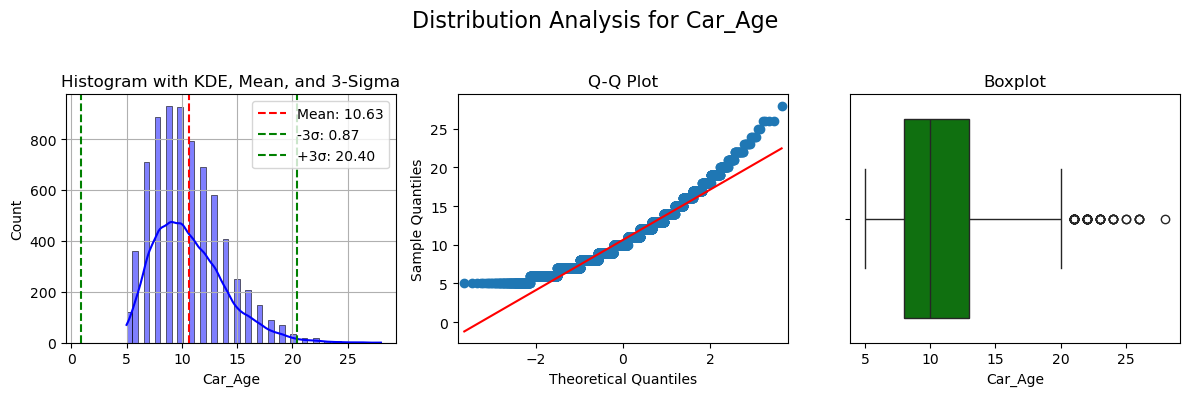

Skewness for Car_Age: 0.84
Kurtosis for Car_Age: 0.91
Kolmogorov-Smirnov Test for Car_Age: Statistic=1.000, p-value=0.000
The column = 'Car_Age' does not appear to be normally distributed.


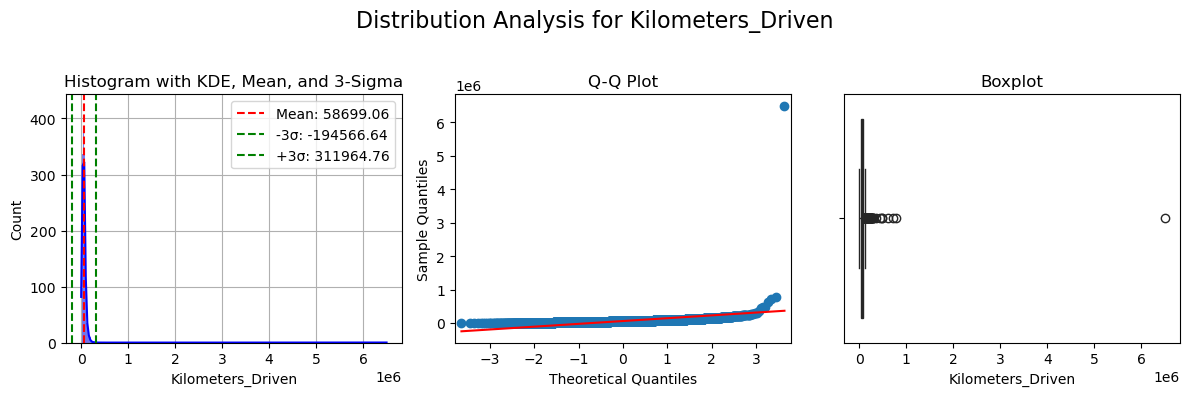

Skewness for Kilometers_Driven: 61.57
Kurtosis for Kilometers_Driven: 4671.51
Kolmogorov-Smirnov Test for Kilometers_Driven: Statistic=1.000, p-value=0.000
The column = 'Kilometers_Driven' does not appear to be normally distributed.


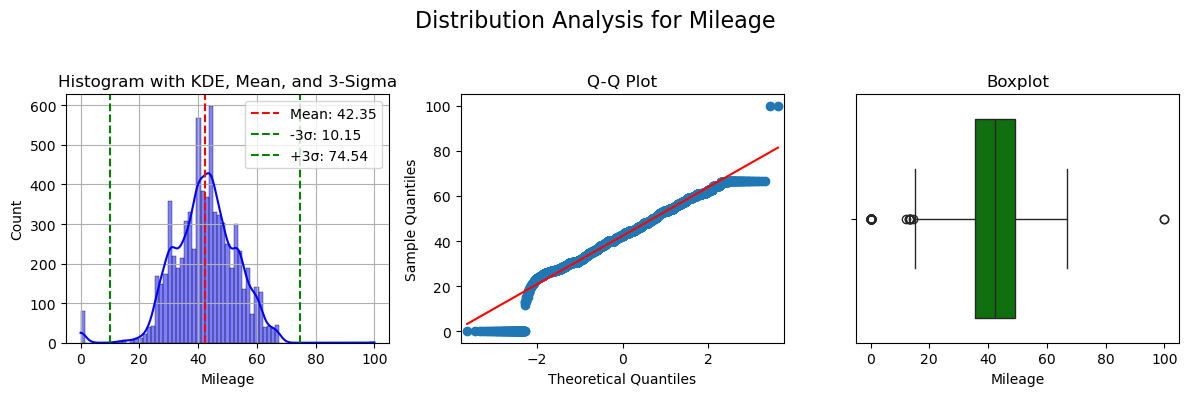

Skewness for Mileage: -0.48
Kurtosis for Mileage: 1.71
Kolmogorov-Smirnov Test for Mileage: Statistic=0.989, p-value=0.000
The column = 'Mileage' does not appear to be normally distributed.


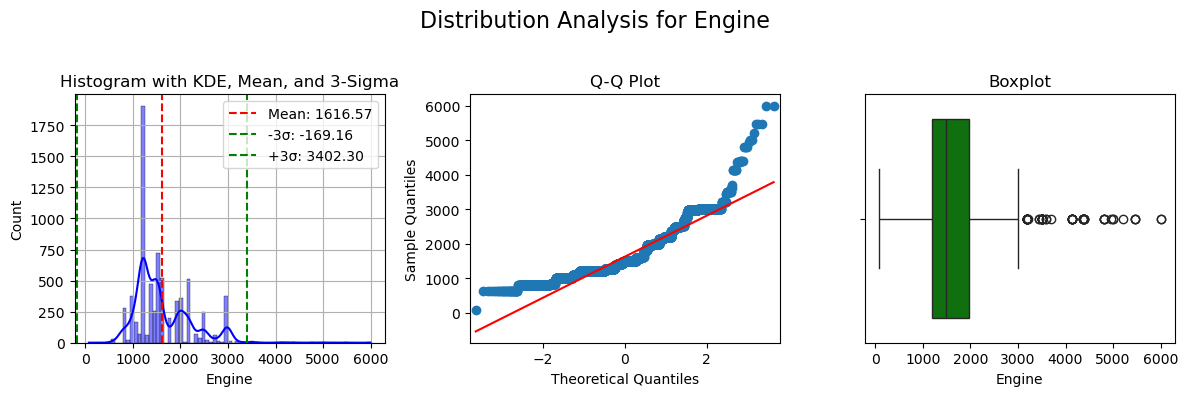

Skewness for Engine: 1.41
Kurtosis for Engine: 3.17
Kolmogorov-Smirnov Test for Engine: Statistic=1.000, p-value=0.000
The column = 'Engine' does not appear to be normally distributed.


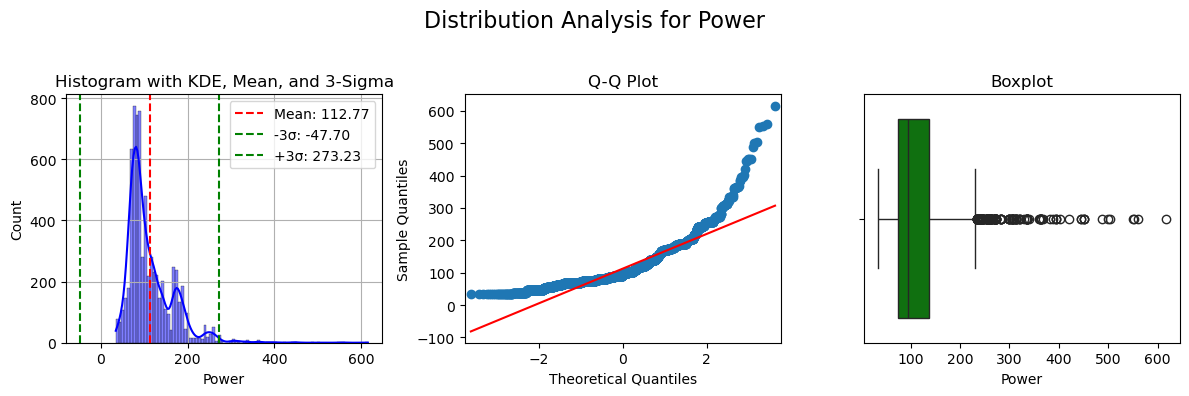

Skewness for Power: 1.96
Kurtosis for Power: 7.12
Kolmogorov-Smirnov Test for Power: Statistic=1.000, p-value=0.000
The column = 'Power' does not appear to be normally distributed.


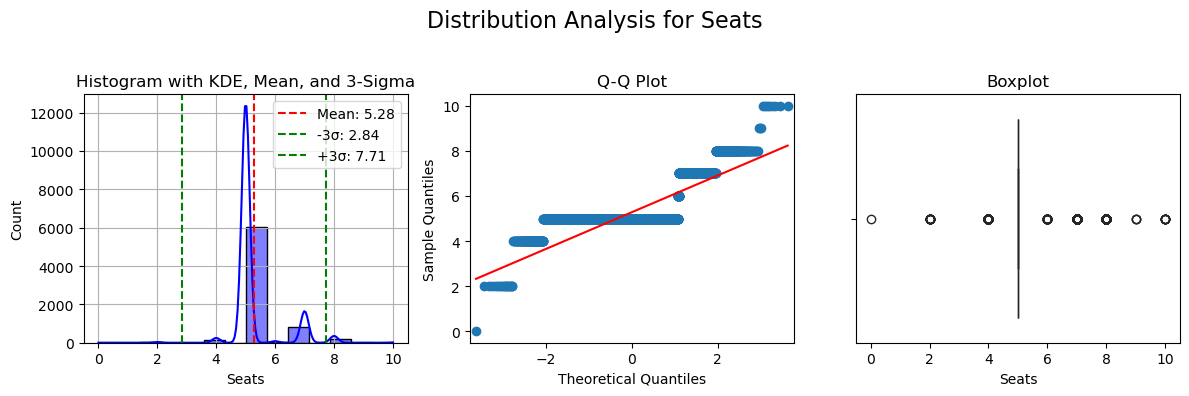

Skewness for Seats: 1.90
Kurtosis for Seats: 4.70
Kolmogorov-Smirnov Test for Seats: Statistic=0.997, p-value=0.000
The column = 'Seats' does not appear to be normally distributed.


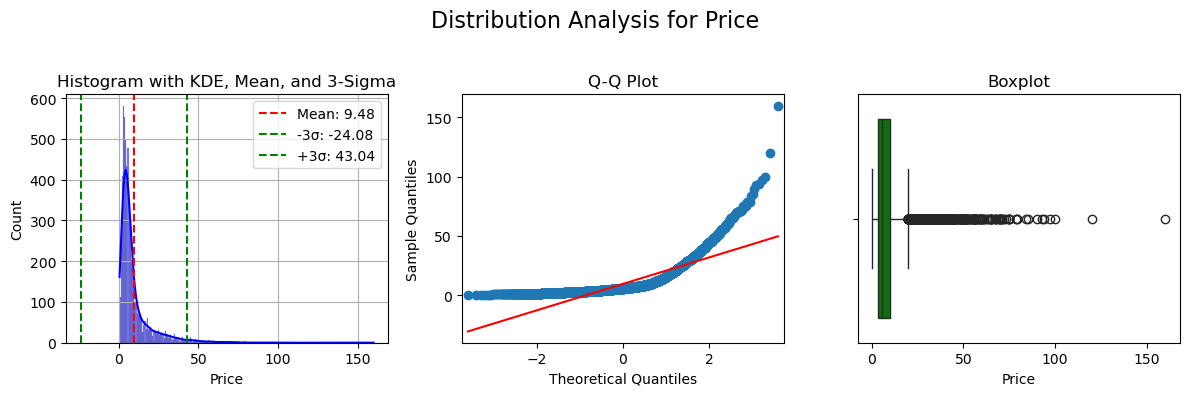

Skewness for Price: 3.33
Kurtosis for Price: 17.08
Kolmogorov-Smirnov Test for Price: Statistic=0.910, p-value=0.000
The column = 'Price' does not appear to be normally distributed.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kstest, skew, kurtosis
import pandas as pd
import numpy as np

def check_distribution(df, column):
    # Drop missing values for the analysis
    data = df[column].dropna()

    # 3. Calculate mean and standard deviation
    mean_value, std_dev = np.mean(data), np.std(data)
    
    # Calculate 3-sigma boundaries
    lower_3sigma = mean_value - 3 * std_dev
    upper_3sigma = mean_value + 3 * std_dev
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f'Distribution Analysis for {column}', fontsize=16)
    
    # 4A. Histogram with KDE, mean, and 3-sigma boundaries
    sns.histplot(data, kde=True, color='blue', ax=axes[0])
    axes[0].set_title('Histogram with KDE, Mean, and 3-Sigma')
    axes[0].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(lower_3sigma, color='green', linestyle='--', label=f'-3σ: {lower_3sigma:.2f}')
    axes[0].axvline(upper_3sigma, color='green', linestyle='--', label=f'+3σ: {upper_3sigma:.2f}')
    axes[0].legend()
    axes[0].grid(True)
    
    
    # QQ_plot to check the notmal distribution 
    sm.qqplot(data, line='s', ax=axes[1])
    axes[1].set_title('Q-Q Plot')
    
    # Boxplot to see if it shows the data 
    sns.boxplot(x=data, ax=axes[2], color='green')
    axes[2].set_title('Boxplot')

    # Adjust layout and show plots
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
    plt.show()

    # 1. Skewness and Kurtosis
    col_skewness = skew(data)
    col_kurtosis = kurtosis(data)
    stat, p_value = kstest(data, 'norm')
    
    print(f"Skewness for {column}: {col_skewness:.2f}")
    print(f"Kurtosis for {column}: {col_kurtosis:.2f}")
    print(f"Kolmogorov-Smirnov Test for {column}: Statistic={stat:.3f}, p-value={p_value:.3f}")

    # Check for normal distribution based on skewness, kurtosis, and K-S test
    if abs(col_skewness) < 0.5 and abs(col_kurtosis) < 3 and p_value > 0.05:
        print(f"The {column = } seems to be normally distributed.")
        return [column, col_skewness, col_kurtosis, stat, p_value, "normal distribution"]
    else:
        print(f"The {column = } does not appear to be normally distributed.")
        return [column, col_skewness, col_kurtosis, stat, p_value, "not normal distribution"]
    


column_stats = [["column_name", "skewness", "kurtosis", "ks-stat", "p_value", "distribution"]]
for column in outlier_columns:
    stats = check_distribution(df, column)
    column_stats.append(stats)

In [18]:
column_stats_df = pd.DataFrame(column_stats[1:], columns=column_stats[0])
column_stats_df.head(10)

,column_name,skewness,kurtosis,ks-stat,p_value,distribution
0,Car_Age,0.839642,0.909033,1.000000,0.0,not normal distribution
1,Kilometers_Driven,61.569838,4671.511206,1.000000,0.0,not normal distribution
2,Mileage,-0.479221,1.705773,0.988832,0.0,not normal distribution
3,Engine,1.412119,3.173880,1.000000,0.0,not normal distribution
4,Power,1.960762,7.123825,1.000000,0.0,not normal distribution
5,Seats,1.901866,4.699330,0.997329,0.0,not normal distribution
6,Price,3.334401,17.077010,0.910282,0.0,not normal distribution


### Please count(print) how many outliers for each column. 


In [19]:
import pandas as pd

def count_outliers(df, column):
    """
    Count the number of outliers in a specified column of a DataFrame using the IQR method,
    while ignoring empty or missing values.

    """
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' does not exist in the DataFrame.")

    missing_count = df[column].isna().sum()

    # Drop NaN values from the specified column
    cleaned_data = df[column].dropna()

    # Check if there is enough data to calculate Q1 and Q3
    if len(cleaned_data) < 4:
        raise ValueError("Not enough non-missing data to determine outliers.")

    # Calculate Q1 and Q3
    Q1 = cleaned_data.quantile(0.25)
    Q3 = cleaned_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outlier_condition = (cleaned_data < lower_bound) | (cleaned_data > upper_bound)
    outlier_count = cleaned_data[outlier_condition].shape[0]

    return [column, df.shape[0], missing_count, outlier_count, df.shape[0] - (missing_count + outlier_count)]

outlier_stats = [["column_name", "total_count", "na/missing/null count", "outlier_count", "good_value_count"]]
for column in outlier_columns:
    stats = count_outliers(df, column)
    outlier_stats.append(stats)

outlier_stats_df = pd.DataFrame(outlier_stats[1:], columns=outlier_stats[0])
outlier_stats_df.head(10)

,column_name,total_count,na/missing/null count,outlier_count,good_value_count
0,Car_Age,7253,0,58,7195
1,Kilometers_Driven,7253,0,258,6995
2,Mileage,7253,0,90,7163
3,Engine,7253,46,65,7142
4,Power,7253,175,273,6805
5,Seats,7253,53,1153,6047
6,Price,7253,1234,718,5301


### Please draw box-plot for the columns. Please draw box-plot together if the scales of the columns are in similar range. Otherwise, please draw box-plot separately.  


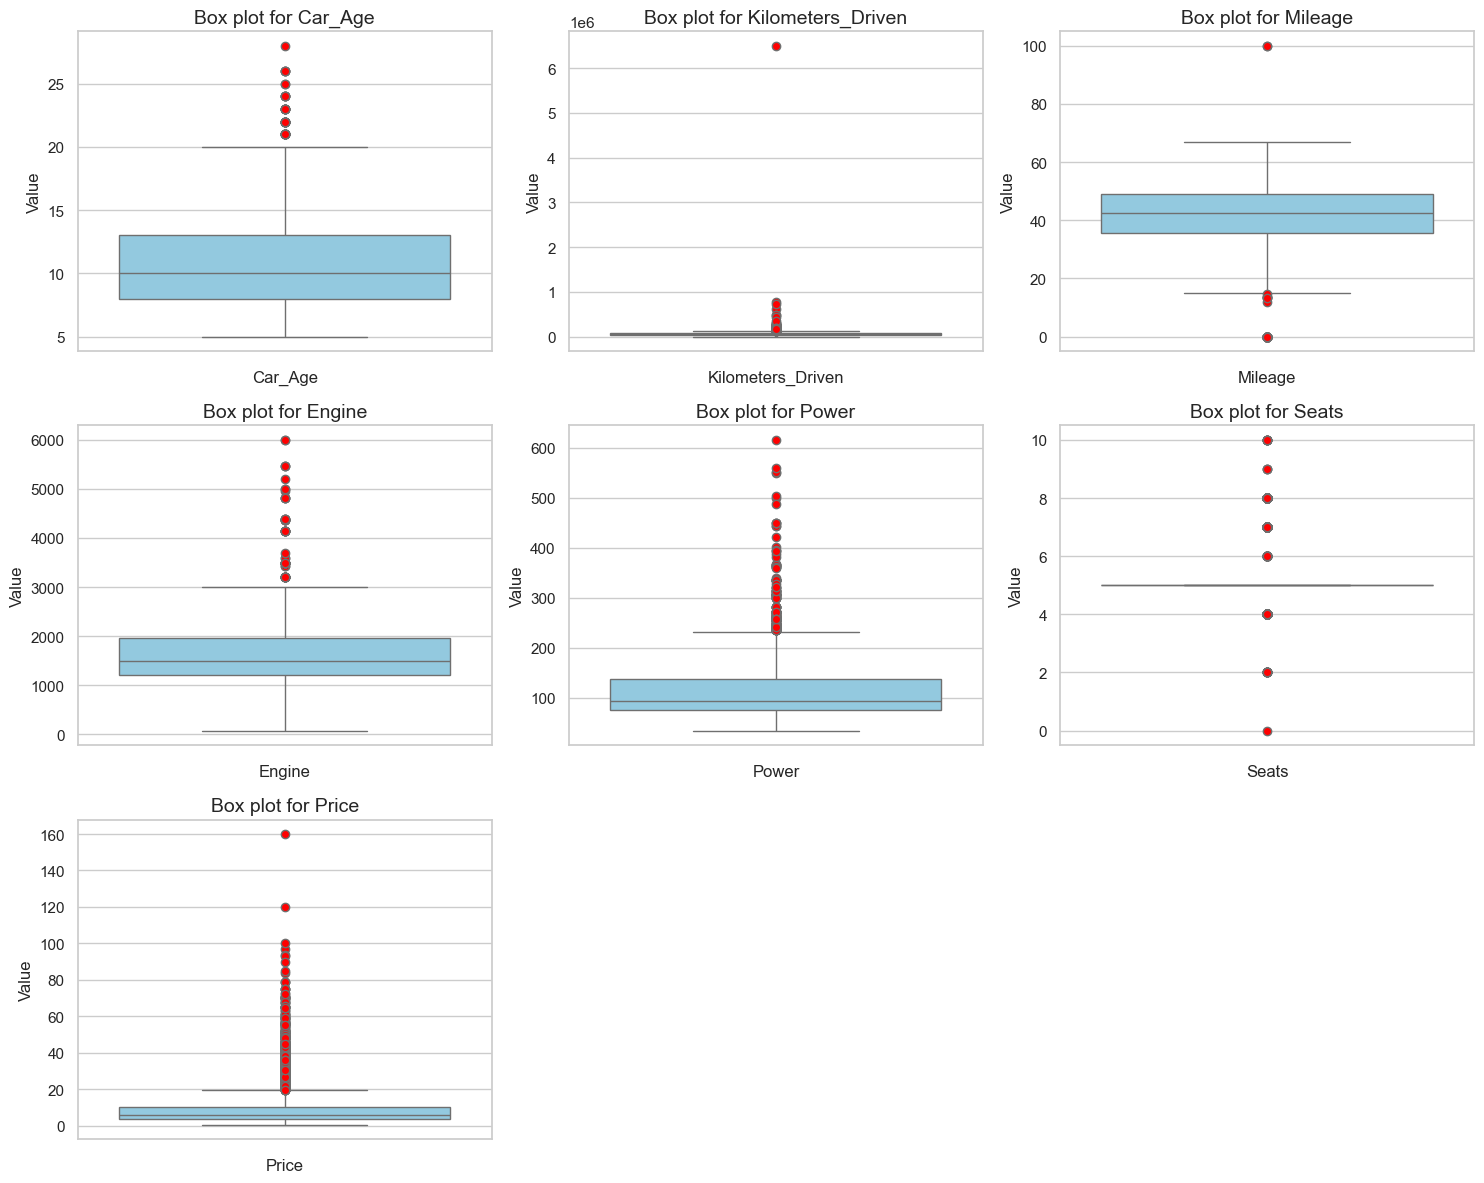

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_boxplots(df, columns):
    """
    Plot box plots for the specified columns from the DataFrame.
    Displays 3 box plots per row, with outliers shown in red.
    """
    # Set the style for seaborn
    sns.set(style="whitegrid")

    # Number of columns for box plots per row
    n_cols = 3
    n_rows = math.ceil(len(columns) / n_cols)  # Calculate number of rows needed

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes

    # Plot each box plot
    for i, col in enumerate(columns):
        if col not in df.columns:
            raise ValueError(f"Column '{col}' does not exist in the DataFrame.")
        
        # Box plot for each column, with outliers in red
        sns.boxplot(data=df, y=col, ax=axes[i], color="skyblue", flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))

        axes[i].set_title(f'Box plot for {col}', fontsize=14)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Value')

    # Hide any extra axes if the number of columns is not a multiple of 3
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_boxplots(df, outlier_columns)

### Please draw box-plot for ‘Mileage’ with ‘Fuel_Type’.    


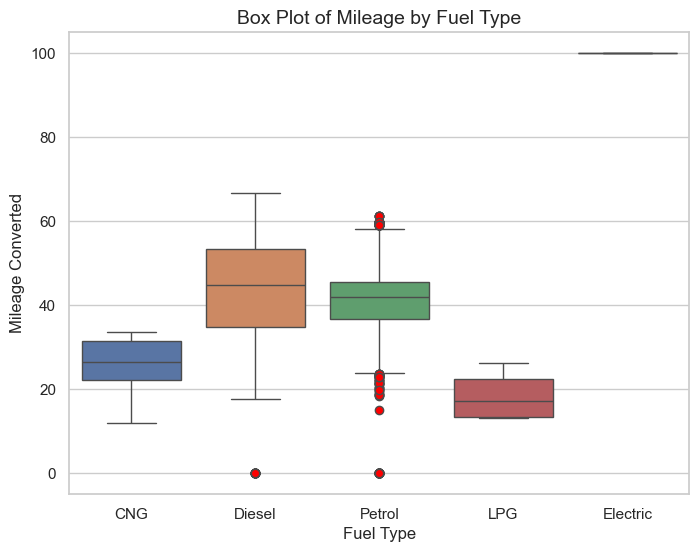

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

flierprops = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Mileage', hue='Fuel_Type', data=df, flierprops=flierprops)
plt.title('Box Plot of Mileage by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type')
plt.ylabel('Mileage Converted')
plt.show()


# 4. (1.5 pts) Pearson correlation coefficient and scatter plot  

### Please calculate Pearson correlation coefficient between two columns for the following columns:  ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’.  
 
### NOTE:  
Before calculating the coefficient, you need to exclude the outliers.  

You should calculate the coefficient from scratch.  

Please draw scatterplots between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. 

Please include the coefficient value inside of the figures. 

In [22]:
print(f"Computing the Pearson correlation coeffecient for columns = {outlier_columns} ")

Computing the Pearson correlation coeffecient for columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'] 


In [23]:
# Remove outliers based on the previously identified IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]



df_no_outliers = df.copy()
for col in outlier_columns:
    df_no_outliers = remove_outliers(df_no_outliers, col)

df_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4060.0,2013.419458,3.038339,2004.00,2011.0000,2014.0000,2016.0000,2019.0000
Kilometers_Driven,4060.0,52699.244828,26273.304060,171.00,33000.0000,52000.0000,69753.7500,131000.0000
Mileage,4060.0,45.676899,8.895804,17.30,39.9840,44.9232,52.4496,66.7968
Engine,4060.0,1368.443842,330.144343,793.00,1197.0000,1248.0000,1498.0000,2997.0000
Power,4060.0,93.392709,30.507945,34.20,73.9400,85.8000,106.0000,231.1000
Seats,4060.0,5.000000,0.000000,5.00,5.0000,5.0000,5.0000,5.0000
Price,4060.0,5.305835,2.875566,0.45,3.2075,4.7000,6.6900,15.0000
Car_Age,4060.0,10.580542,3.038339,5.00,8.0000,10.0000,13.0000,20.0000


/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_55563/4103984890.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return numerator / denominator


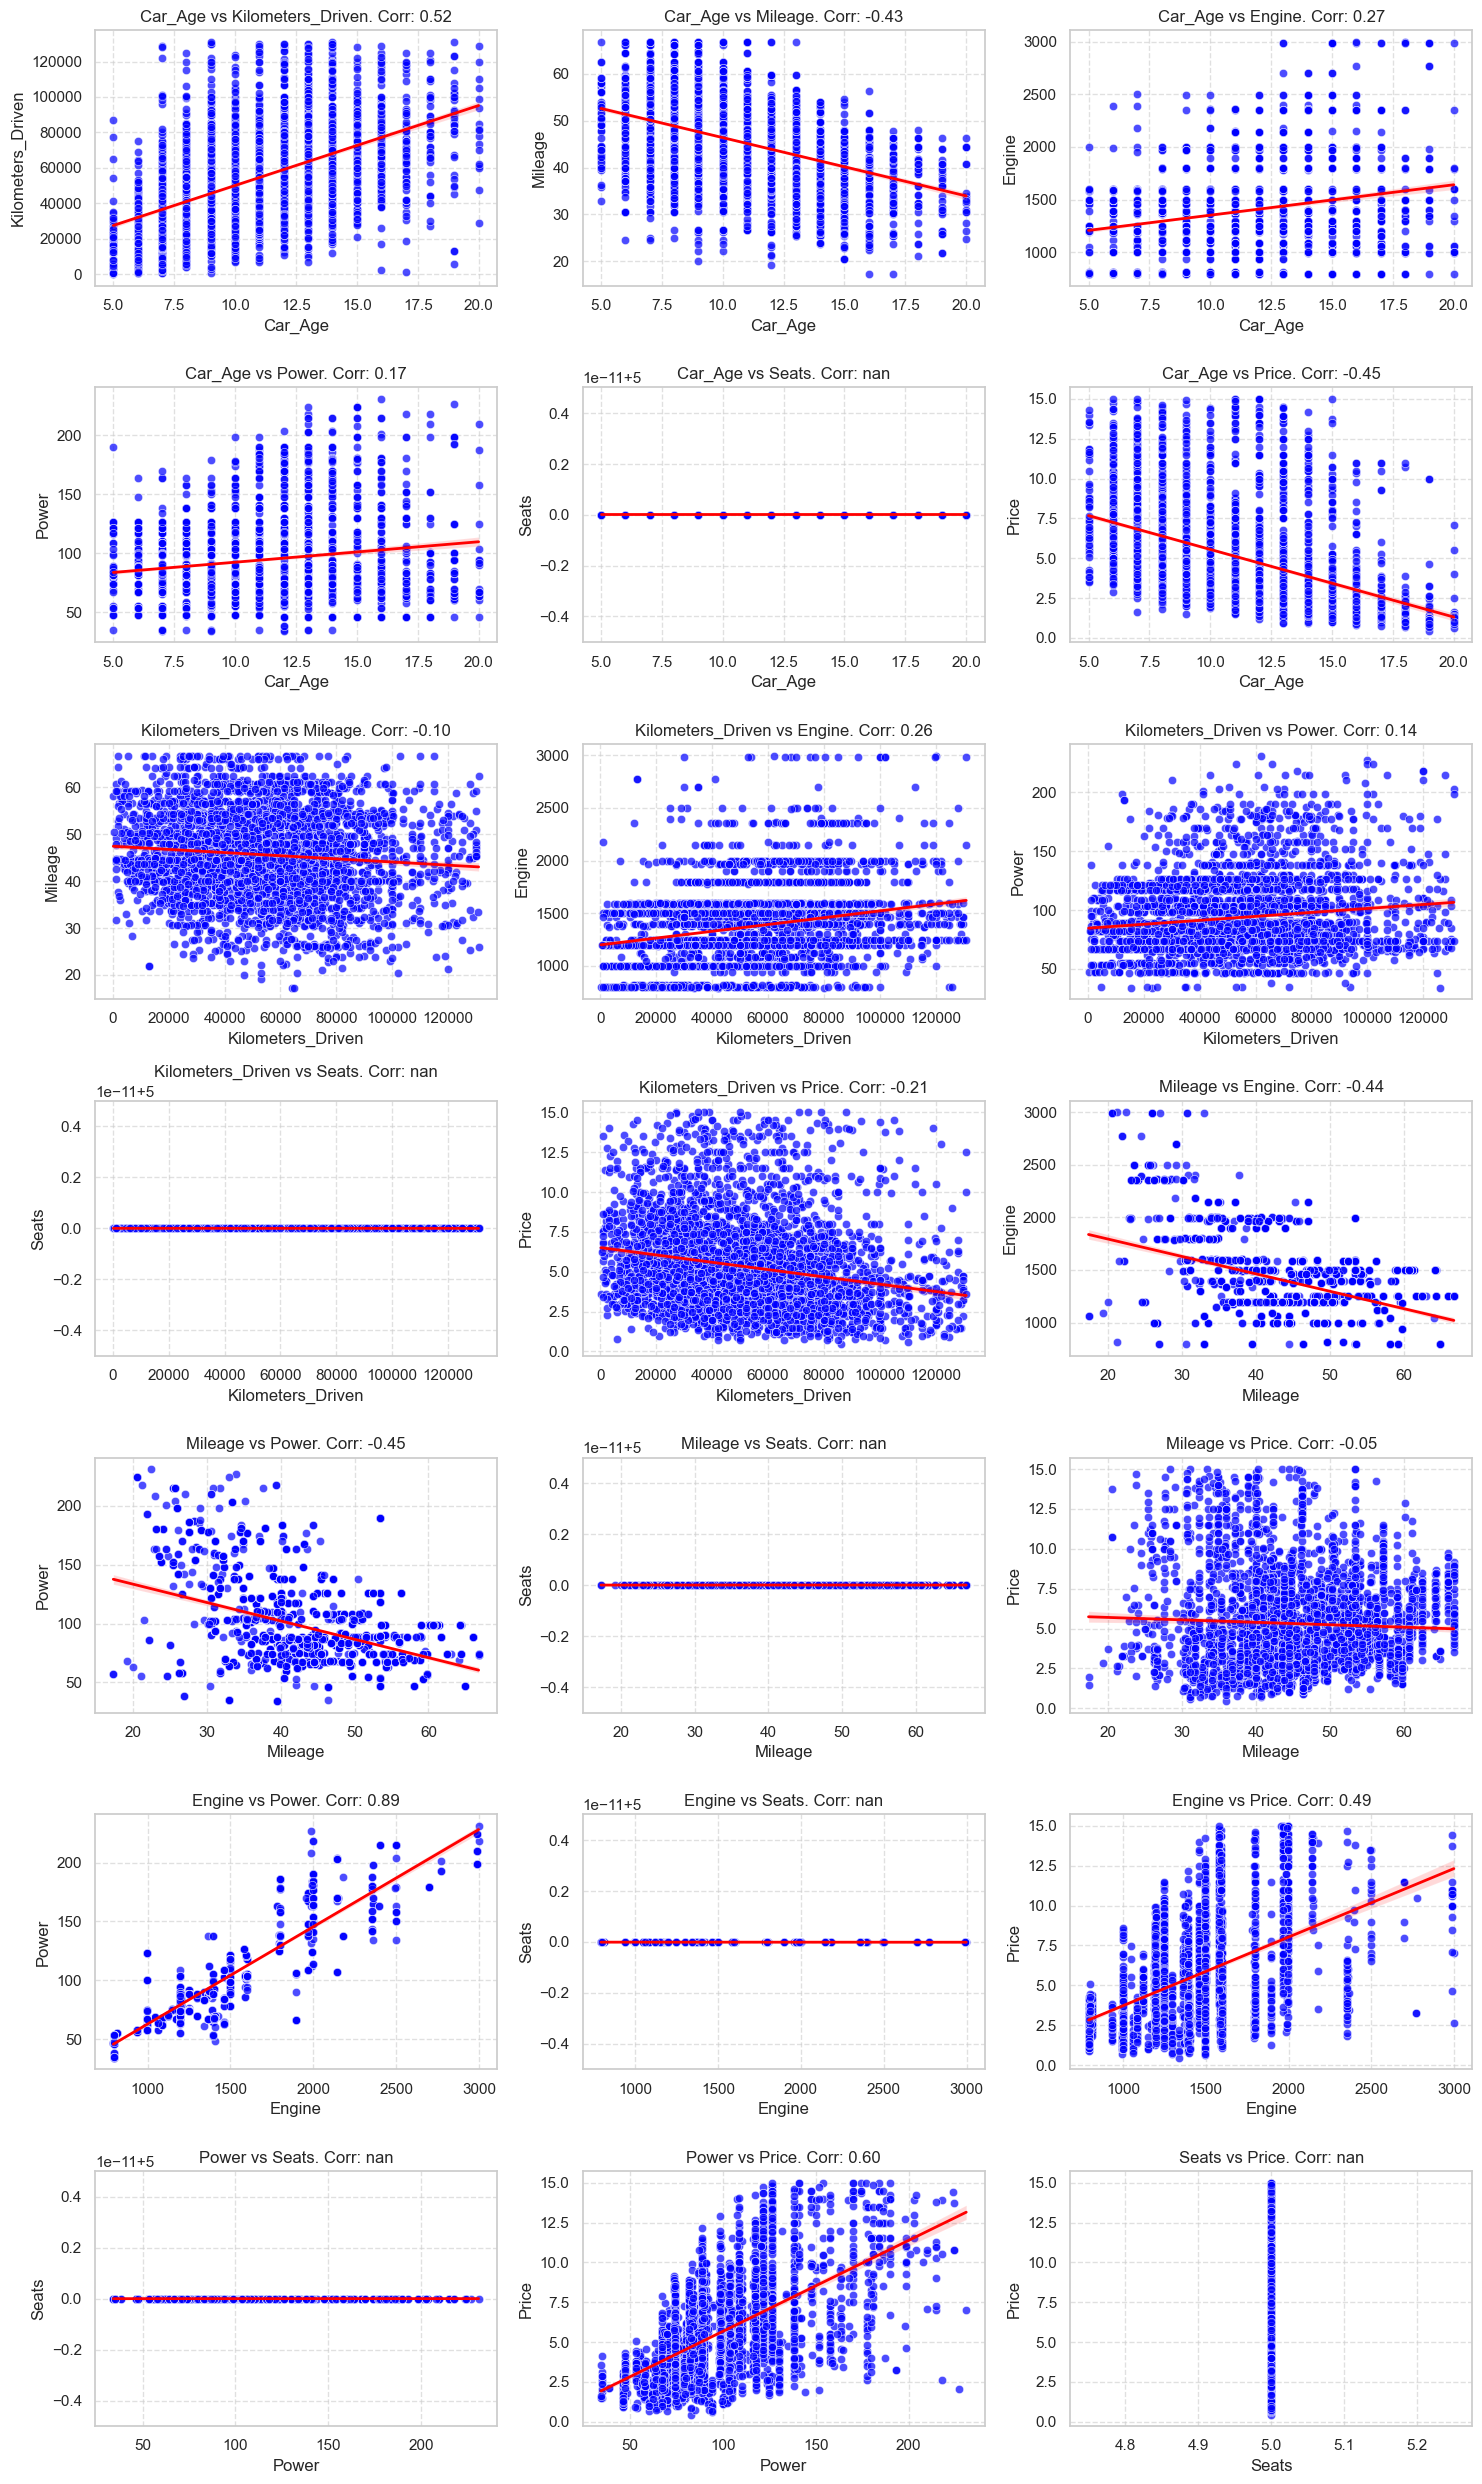

In [24]:
def pearson_correlation(x, y):
    """
    This function computes the pearson correlation coeffecint.
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    return numerator / denominator


pearson_corr = {}
for i in range(len(outlier_columns)):
    for j in range(i+1, len(outlier_columns)):
        col1 = outlier_columns[i]
        col2 = outlier_columns[j]
        corr_value = pearson_correlation(df_no_outliers[col1], df_no_outliers[col2])
        pearson_corr[(col1, col2)] = corr_value

# Display scatterplots with Pearson correlation coefficient inside the figures
plt.figure(figsize=(15, 25))
plot_num = 1
for i in range(len(outlier_columns)):
    for j in range(i+1, len(outlier_columns)):
        plt.subplot(7, 3, plot_num)
        col1 = outlier_columns[i]
        col2 = outlier_columns[j]
        plt.grid(True, linestyle='--', alpha=0.6)
        sns.scatterplot(x=df_no_outliers[col1], y=df_no_outliers[col2], alpha=0.7, color='blue')  
        sns.regplot(x=df_no_outliers[col1], y=df_no_outliers[col2], scatter=False, color='red', line_kws={'linewidth': 2})

        plt.title(f'{col1} vs {col2}. Corr: {pearson_corr[(col1, col2)]:.2f}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plot_num += 1

plt.tight_layout()
plt.show()

In [25]:
pearson_corr_df = pd.DataFrame.from_dict(pearson_corr, orient='index', columns=['Correlation Coefficient'])
pearson_corr_df

,Correlation Coefficient
"(Car_Age, Kilometers_Driven)",0.521611
"(Car_Age, Mileage)",-0.425239
"(Car_Age, Engine)",0.266052
"(Car_Age, Power)",0.172914
"(Car_Age, Seats)",NaN
"(Car_Age, Price)",-0.448393
"(Kilometers_Driven, Mileage)",-0.099383
"(Kilometers_Driven, Engine)",0.256588
"(Kilometers_Driven, Power)",0.144233
"(Kilometers_Driven, Seats)",NaN


# 5. (3 pts) Handling missing values

### There are missing values in the following columns: ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please treat the outliers also as missing values.


In [26]:
df.head()
df['brand'] = df['Name'].str.split().str[0]
df[['brand', 'Fuel_Type']].value_counts()


brand        Fuel_Type
Hyundai      Petrol       905
Maruti       Petrol       835
Honda        Petrol       583
Maruti       Diesel       549
Hyundai      Diesel       424
                         ... 
OpelCorsa    Petrol         1
Land         Petrol         1
Lamborghini  Petrol         1
Hindustan    Diesel         1
Mahindra     Electric       1
Name: count, Length: 63, dtype: int64

## (1.5 pt) Please count(print) missing values for each column in the columns of ‘Engine’, ‘Power’, and ‘Seats’. 

### Please impute the missing values based on subclass (subgroups).

### Please draw histogram(distribution) for each column and use different color for the imputed missing values.

### NOTE:
For categorical or discrete features, use mode. For continuous features, use mean for all samples belonging to the same subclass. 
If imputing using a subclass or multiple subclasses does not impute all the missing values, please impute using the subclass as much as possible. Then, impute using the global constant for the remaining rows.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
 13  Mileage_unit       7253 non-null   object 
 14  Engine_unit        7253 non-null   object 
 15  Power_unit         7253 non-null   object 
 16  brand              7253 

In [28]:
missing_columns = ['Engine', 'Power', 'Seats']

missing_stats = [["column_name", "total_count", "na_count", "outlier_count", "good_value_count"]]
for column in missing_columns:
    stats = count_outliers(df, column)
    missing_stats.append(stats)

missing_stats_df = pd.DataFrame(missing_stats[1:], columns=missing_stats[0])
missing_stats_df.head(10)

,column_name,total_count,na_count,outlier_count,good_value_count
0,Engine,7253,46,65,7142
1,Power,7253,175,273,6805
2,Seats,7253,53,1153,6047


--------------------------------------------------

 Missing Value Processing the column = 'Engine'
 Columns Stats for column = 'Engine', lower_bound = 43.0, upper_bound = 3123.0
 Total Records = 7253,  Missing Value Count = 46, Outlier Count = 65


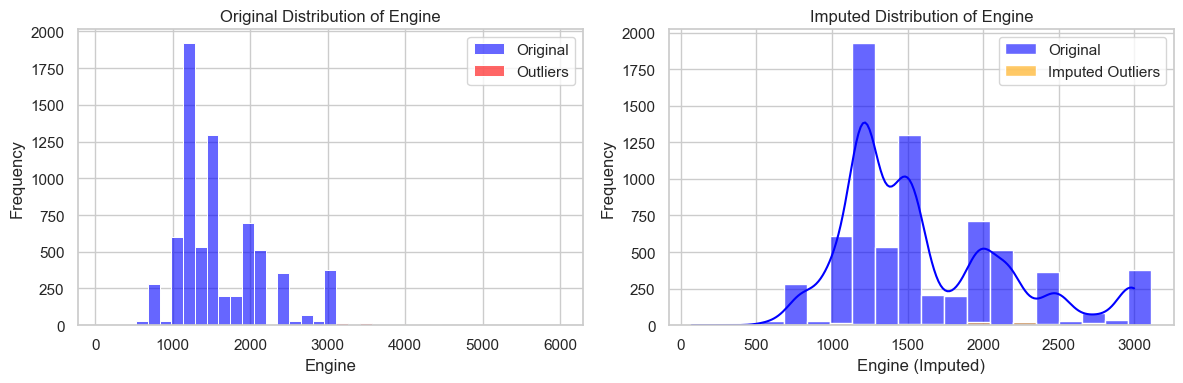

--------------------------------------------------

 Missing Value Processing the column = 'Power'
 Columns Stats for column = 'Power', lower_bound = -19.64999999999999, upper_bound = 232.75
 Total Records = 7253,  Missing Value Count = 175, Outlier Count = 273


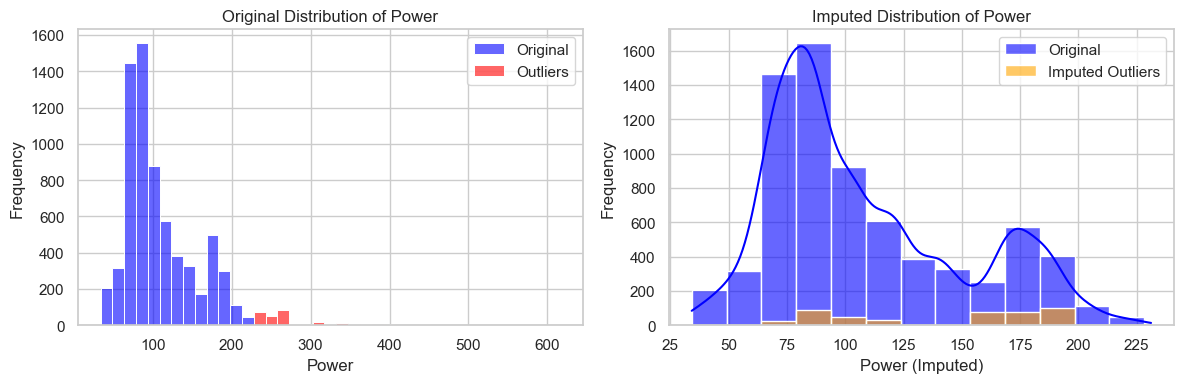

--------------------------------------------------

 Missing Value Processing the column = 'Seats'
 Columns Stats for column = 'Seats', lower_bound = 5.0, upper_bound = 5.0
 Total Records = 7253,  Missing Value Count = 53, Outlier Count = 1153


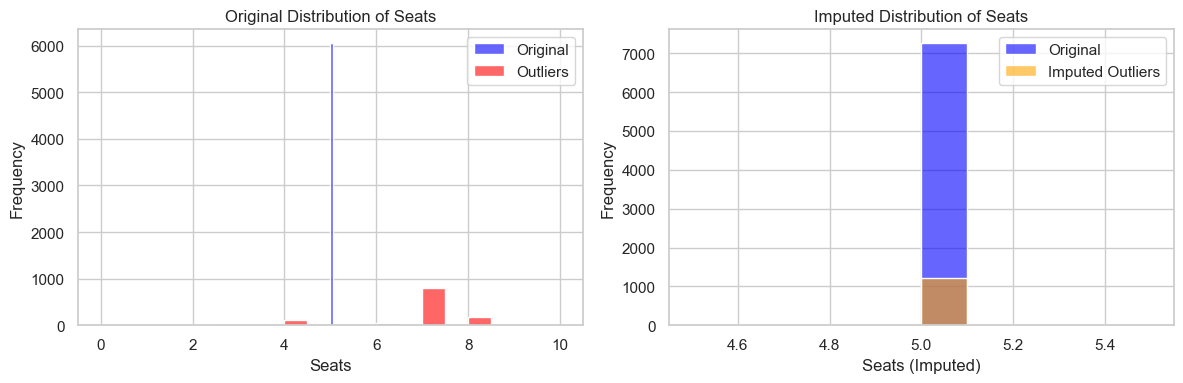

In [38]:
def detect_impute_and_plot(df, column, subclass):
    print("-"*50)
    print(f"\n Missing Value Processing the {column = }")
    # Calculate Q1, Q3, and IQR for outlier detection

    bins = 20 if column == 'Seats' else np.linspace(df[column].min(), df[column].max(), 40)
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f" Columns Stats for {column = }, {lower_bound = }, {upper_bound = }")

    # Mark outliers as NaN and store them for plotting
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])

    filtered_stats = [row for row in missing_stats if row[0] == column][0]
    print(f" Total Records = {filtered_stats[1]},  Missing Value Count = {filtered_stats[2]}, Outlier Count = {filtered_stats[3]}")
    
    # Impute missing values using the mean of the subclass
    df[column + '_imputed'] = df.groupby(subclass)[column].transform(lambda x: x.fillna(x.mean()))
    
    # If some missing values are still present, impute with the global mean
    global_mean = df[column].mean()
    df[column + '_imputed'].fillna(global_mean, inplace=True)

    # Plot original and imputed distributions side by side
    plt.figure(figsize=(12, 4))

    # Original data plot with outliers marked in red
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), color='blue', label='Original', bins=bins, alpha=0.6)
    sns.histplot(outliers[column], color='red', label='Outliers',  bins=bins, alpha=0.6)
    plt.title(f'Original Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

    
    # After Imputations data distribution
    bins = 10 if column == 'Seats' else bins[(bins >= lower_bound) & (bins <= upper_bound)]
    plt.subplot(1, 2, 2)
    sns.histplot(df[column + '_imputed'], color='blue', label='Original', kde=True, bins=bins, alpha=0.6)
    imputed_outliers = df[df[column].isna()][column + '_imputed']
    sns.histplot(imputed_outliers, color='orange', label='Imputed Outliers', bins=bins, alpha=0.6)
    plt.title(f'Imputed Distribution of {column}')
    plt.xlabel(column + ' (Imputed)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()
    df[column] = df[column + '_imputed']
    df = df.drop(columns = [column + '_imputed'])
    return df

simple_imputation_columns = ['Engine', 'Power', 'Seats']
for col in simple_imputation_columns:
    df = detect_impute_and_plot(df.copy(), col, ['brand', 'Transmission', 'Fuel_Type'])

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0000,2014.00000,2016.00000,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0000,53416.00000,73000.00000,6500000.0
Mileage,7253.0,42.348907,10.732479,0.00,35.5152,42.47712,49.20384,100.0
Engine,7253.0,1600.944788,551.432250,72.00,1198.0000,1493.00000,1968.00000,2999.0
Power,7253.0,108.231109,41.741310,34.20,76.0000,93.70000,138.00000,231.1
Seats,7253.0,5.000000,0.000000,5.00,5.0000,5.00000,5.00000,5.0
Price,6019.0,9.479468,11.187917,0.44,3.5000,5.64000,9.95000,160.0
Car_Age,7253.0,10.634634,3.254421,5.00,8.0000,10.00000,13.00000,28.0


## (1.5 pt) Please count(print) missing values for each column in the columns of ‘Mileage’ and ‘Price’. 
## Please impute the missing values using linear regression. 
## Please draw histogram(distribution) for each column and use different color for the imputed missing values

## NOTE: 
You need to find which columns have strong correlations with ‘Mileage’ or ‘Price’. Then, build the linear regression model using scikit-learn library and apply the model to impute the missing values. 

In [40]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7253 non-null   float64
 9   Power              7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
 13  Mileage_unit       7253 non-null   object 
 14  Engine_unit        7253 non-null   object 
 15  Power_unit         7253 non-null   object 
 16  brand              7253 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_unit,Engine_unit,Power_unit,brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.0,58.16,5.0,1.75,14,km/kg,cc,bhp,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,46.26384,1582.0,126.20,5.0,12.50,9,kmpl,cc,bhp,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,42.80640,1199.0,88.70,5.0,4.50,13,kmpl,cc,bhp,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,48.85104,1248.0,88.76,5.0,6.00,12,kmpl,cc,bhp,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,35.75040,1968.0,140.80,5.0,17.74,11,kmpl,cc,bhp,Audi


In [41]:
one_hot_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True, dtype=int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       7253 non-null   object 
 1   Location                   7253 non-null   object 
 2   Year                       7253 non-null   int64  
 3   Kilometers_Driven          7253 non-null   int64  
 4   Mileage                    7253 non-null   float64
 5   Engine                     7253 non-null   float64
 6   Power                      7253 non-null   float64
 7   Seats                      7253 non-null   float64
 8   Price                      6019 non-null   float64
 9   Car_Age                    7253 non-null   int64  
 10  Mileage_unit               7253 non-null   object 
 11  Engine_unit                7253 non-null   object 
 12  Power_unit                 7253 non-null   object 
 13  brand                      7253 non-null   objec

In [42]:
missing_columns_lr = ['Mileage', 'Price']

missing_stats_lr = [["column_name", "total_count", "na_count", "outlier_count", "good_value_count"]]
for column in missing_columns_lr:
    stats = count_outliers(df, column)
    missing_stats_lr.append(stats)

missing_stats_lr_df = pd.DataFrame(missing_stats_lr[1:], columns=missing_stats_lr[0])
missing_stats_lr_df.head(10)

,column_name,total_count,na_count,outlier_count,good_value_count
0,Mileage,7253,0,90,7163
1,Price,7253,1234,718,5301


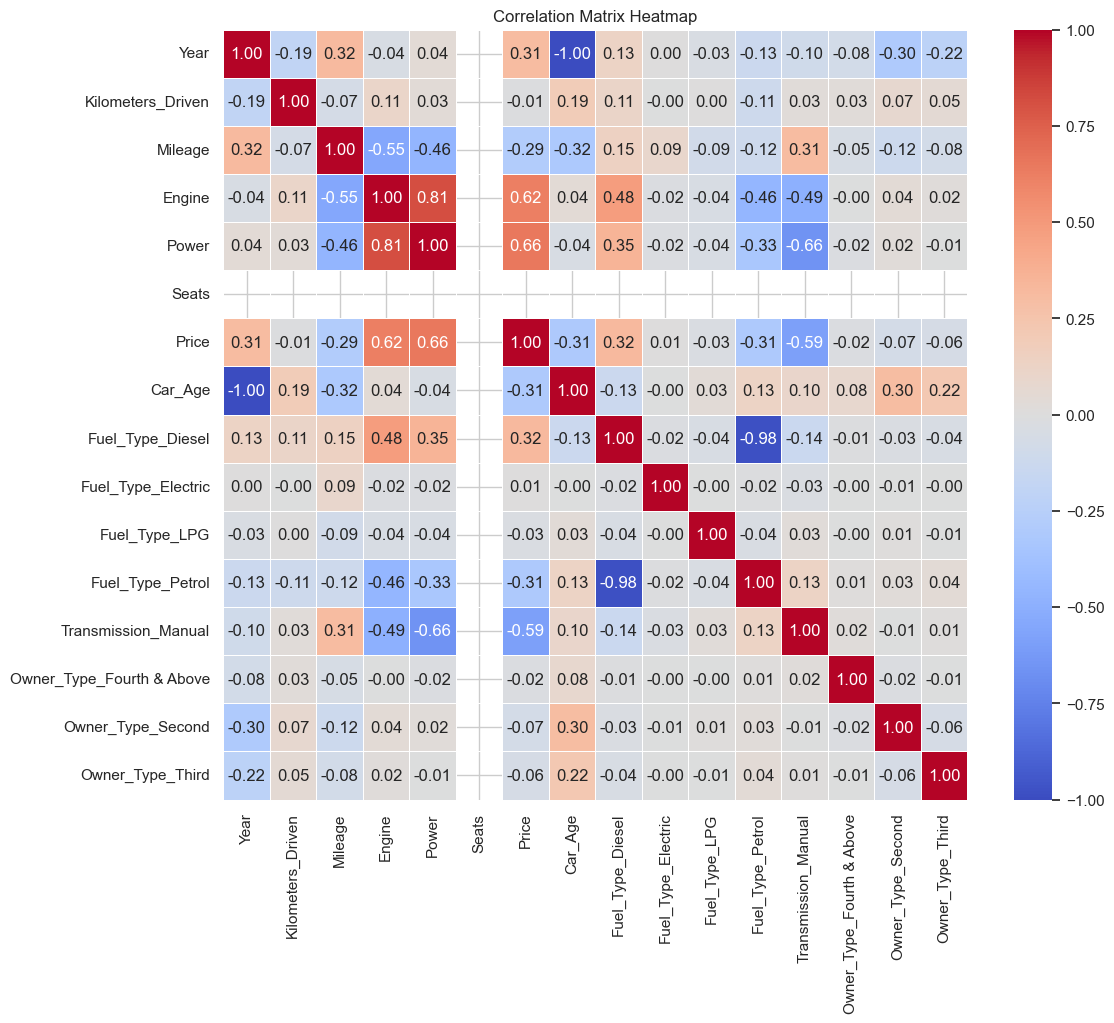

In [46]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

--------------------------------------------------

 Missing Value Processing the column = 'Mileage'
 Total Records = 7253,  Missing Value Count = 0, Outlier Count = 90
Columns Stats for column = 'Mileage', lower_bound = 14.982240000000001, upper_bound = 69.7368
Number of values that need to be processed = 90
For column = 'Mileage', top n = 5, valid variables are = ['Engine', 'Power', 'Year', 'Car_Age', 'Transmission_Manual']


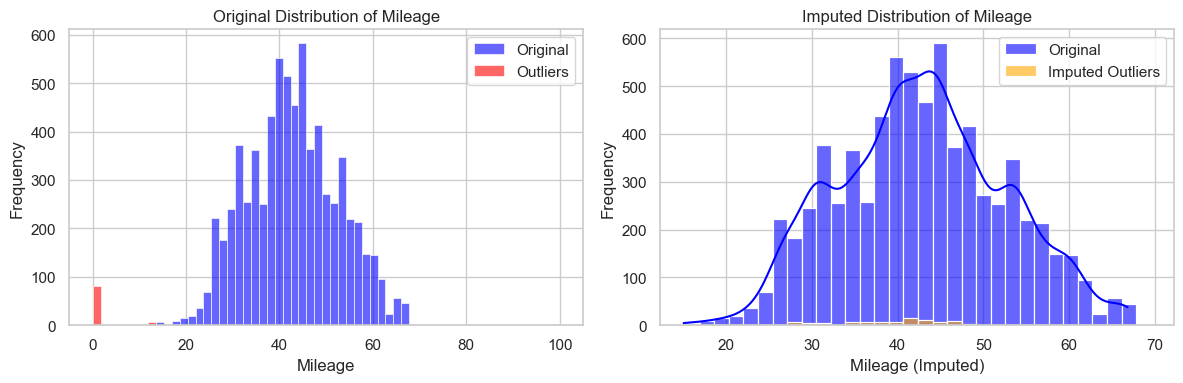

--------------------------------------------------

 Missing Value Processing the column = 'Price'
 Total Records = 7253,  Missing Value Count = 1234, Outlier Count = 718
Columns Stats for column = 'Price', lower_bound = -6.174999999999999, upper_bound = 19.625
Number of values that need to be processed = 1952
For column = 'Price', top n = 5, valid variables are = ['Power', 'Engine', 'Transmission_Manual', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


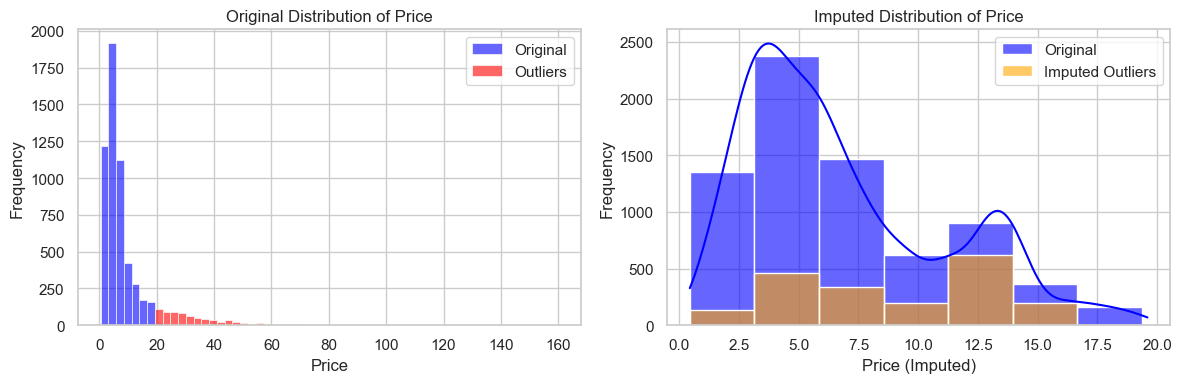

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def get_top_n_features(df, column, correlation_matrix, n):

    sorted_features = correlation_matrix[column].abs().drop(column).sort_values(ascending=False).index.tolist()
    top_n_features = []
    for feature in sorted_features:
        if df[feature].isna().sum() == 0:  
            top_n_features.append(feature)
        if len(top_n_features) == n:
            break  

    print(f"For {column = }, top {n = }, valid variables are = {top_n_features}")

    if len(top_n_features) < n:
        print(f"Not enough correlated variables without NaN values to perform regression for {column}.")
        return top_n_features

    return top_n_features


def get_predictions(df, column, top_n_features):
    X, y = df[top_n_features], df[column]
    X_train, y_train = X[df[column].notna()], y[df[column].notna()]
    model = LinearRegression()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X[df[column].isna()])
    return predicted_values


def detect_impute_and_plot_lr(df, column, correlation_matrix, n = 2):
    
    print("-"*50)
    print(f"\n Missing Value Processing the {column = }")
    filtered_stats = [row for row in missing_stats_lr if row[0] == column][0]
    print(f" Total Records = {filtered_stats[1]},  Missing Value Count = {filtered_stats[2]}, Outlier Count = {filtered_stats[3]}")
    
    bins = np.linspace(df[column].min(), df[column].max(), 60)

    # Calculate Q1, Q3, and IQR for outlier detection
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Columns Stats for {column = }, {lower_bound = }, {upper_bound = }")

    # Mark outliers as NaN and store them for plotting
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
    
    print(f"Number of values that need to be processed = {df[column].isna().sum()}")
    top_n_features = get_top_n_features(df, column, correlation_matrix, n)
    predicted_values = get_predictions(df, column, top_n_features)

    # Fill missing values with the predictions
    df[column + '_imputed'] = df[column]
    df.loc[df[column].isna(), column + '_imputed'] = predicted_values

    
    plt.figure(figsize=(12, 4))
    # Original data plot with outliers marked in red
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), color='blue', label='Original', bins=bins, alpha=0.6)
    sns.histplot(outliers[column], color='red', label='Outliers', bins=bins, alpha=0.6)
    plt.title(f'Original Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

    
    # Imputed data plot, imputations marked in orange colors 
    plt.subplot(1, 2, 2)
    bins = bins[(bins >= lower_bound) & (bins <= upper_bound)]
    sns.histplot(df[column+ '_imputed'].dropna(), color='blue', label='Original', kde=True, bins=bins, alpha=0.6)
    # Show imputed outliers in green
    imputed_outliers = df[df[column].isna()][column + '_imputed']
    sns.histplot(imputed_outliers, color='orange', label='Imputed Outliers',  bins=bins, alpha=0.6)
    plt.title(f'Imputed Distribution of {column}')
    plt.xlabel(column + ' (Imputed)')
    plt.ylabel('Frequency')
    plt.legend()

    
    plt.tight_layout()
    plt.show()
    df[column] = df[column + '_imputed']
    df = df.drop(columns = [column + '_imputed'])
    return df
    

for col in ['Mileage', 'Price']:
    df = detect_impute_and_plot_lr(df.copy(), col, correlation_matrix, 5)
    # print(df_impute_lr.describe().T)


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.0000,2011.0000,2014.000000,2016.00000,2.019000e+03
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.0000,34000.0000,53416.000000,73000.00000,6.500000e+06
Mileage,7253.0,42.799065,9.689237,15.0528,35.7504,42.618240,49.20384,6.679680e+01
Engine,7253.0,1600.944788,551.432250,72.0000,1198.0000,1493.000000,1968.00000,2.999000e+03
Power,7253.0,108.231109,41.741310,34.2000,76.0000,93.700000,138.00000,2.311000e+02
Seats,7253.0,5.000000,0.000000,5.0000,5.0000,5.000000,5.00000,5.000000e+00
Price,7253.0,6.877715,4.245259,0.4400,3.6100,5.738632,9.48000,1.960000e+01
Car_Age,7253.0,10.634634,3.254421,5.0000,8.0000,10.000000,13.00000,2.800000e+01
Fuel_Type_Diesel,7253.0,0.531091,0.499067,0.0000,0.0000,1.000000,1.00000,1.000000e+00
Fuel_Type_Electric,7253.0,0.000276,0.016605,0.0000,0.0000,0.000000,0.00000,1.000000e+00
